# Importing Libraries and Data Set

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [3]:
df_churn=pd.read_csv('churn_data.csv')

In [4]:
df_cust=pd.read_csv('customer_data.csv')

In [5]:
df_internet=pd.read_csv('internet_data.csv')

In [6]:
df_churn.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df_churn.info() # No null vales Records are 7043

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 495.3+ KB


In [8]:
df_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [9]:
df_cust.info() # No Null values Records are 7043

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [10]:
df_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [11]:
df_cust.info() # No null Values  Records are 7043

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


Joining all data set

In [12]:
# Refer Pandas documents  https://pandas.pydata.org/docs/user_guide/merging.html

In [13]:
data= (df_internet.merge(df_cust, on =['customerID'], suffixes=('_left','_right') )).merge(df_churn, on=['customerID'], suffixes=('_left','_right') )

In [14]:
data.head(2)

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,...,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No,Female,...,Yes,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No,Male,...,No,No,34,Yes,One year,No,Mailed check,56.95,1889.5,No


In [15]:
data.shape

(7043, 21)

In [16]:
data.columns.values

array(['customerID', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

### data infirmation

  **customerID:** Customer ID

  **MultipleLines:** Whether the customer has multiple lines or not (Yes, No, No phone service)

  **InternetService:** Customer’s internet service provider (DSL, Fiber optic, No)

  **OnlineSecurity:** Whether the customer has online security or not (Yes, No, No internet service)

  **OnlineBackup:** Whether the customer has online backup or not (Yes, No, No internet service)

  **DeviceProtection:** Whether the customer has device protection or not (Yes, No, No internet service)

  **TechSupport:** bold text Whether the customer has tech support or not (Yes, No, No internet service)

  **StreamingTV:** Whether the customer has streaming TV or not (Yes, No, No internet service)

  **StreamingMovies:** Whether the customer has streaming movies or not (Yes, No, No internet service)

  **gender:** gender (female, male)

  **SeniorCitizen:** Whether the customer is a senior citizen or not (1, 0)

  **PartnerWhether:** the customer has a partner or not (Yes, No)

  **Dependents:** Whether the customer has dependents or not (Yes, No)

  **tenure:** Number of months the customer has stayed with the company

  **PhoneService:** Whether the customer has a phone service or not (Yes, No)

  **Contract:** The contract term of the customer (Month-to-month, One year, Two year)

  **PaperlessBilling:** Whether the customer has paperless billing or not (Yes, No)

  **PaymentMethod:** The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

  **MonthlyCharges:** The amount charged to the customer monthly

  **TotalCharges:** The total amount charged to the customer

  **Churn:** Whether the customer churned or not (Yes or No)

In [17]:
data.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [18]:
data['Churn'].value_counts()/data['Churn'].count() # Data divided in 74 :26 Data set is inbalanced
# 26.6 % of customers switched to another firm

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [19]:
data.dtypes

customerID           object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Total Charges are object . Need to convert float

In [20]:
data.TotalCharges.values # It is  string

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [21]:
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce') # Converting data form object to numaric
print(data.TotalCharges.dtypes)
print(data.TotalCharges.values)

float64
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]


In [22]:
data.isnull().sum() # 11 missing values in Total charges

customerID           0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [23]:
data[np.isnan(data['TotalCharges'])] # Lets Find the null values and Index No

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,...,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Female,...,Yes,Yes,0,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Male,...,No,Yes,0,Yes,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Female,...,Yes,Yes,0,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Male,...,Yes,Yes,0,Yes,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Female,...,Yes,Yes,0,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Male,...,Yes,Yes,0,Yes,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Male,...,Yes,Yes,0,Yes,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Female,...,Yes,Yes,0,Yes,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Male,...,Yes,Yes,0,Yes,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Female,...,Yes,Yes,0,Yes,Two year,No,Mailed check,73.35,NaN,No


In [24]:
data[data['tenure'] == 0].index # Tenure is also 0 but Total Charges are alos Nan

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [25]:
data.drop(labels=data[data['tenure'] == 0].index, axis=0, inplace=True) # Dropping index conflicting with Tenure and Total Charges with null Values
data[data['tenure'] == 0].index

Int64Index([], dtype='int64')

In [26]:
data.fillna(data["TotalCharges"].mean())


,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,...,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No,Female,...,Yes,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No,Male,...,No,No,34,Yes,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No,Male,...,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No,Male,...,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No,Female,...,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Male,...,Yes,Yes,24,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Female,...,Yes,Yes,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,No phone service,DSL,Yes,No,No,No,No,No,Female,...,Yes,Yes,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Yes,Fiber optic,No,No,No,No,No,No,Male,...,Yes,No,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


Lets Check for Null value sum is  0 or Not

In [27]:
data.isnull().sum() # seems Ok

customerID          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Recheck for Tenure havin 0 Values

In [28]:
data[data['tenure'] == 0].index # Index for Null Values in the data set is Blank Sound OK

Int64Index([], dtype='int64')

In [29]:
data.shape # Earlier (7143 ,21 ) Dopped 11  records in data set

(7032, 21)

<Axes: >

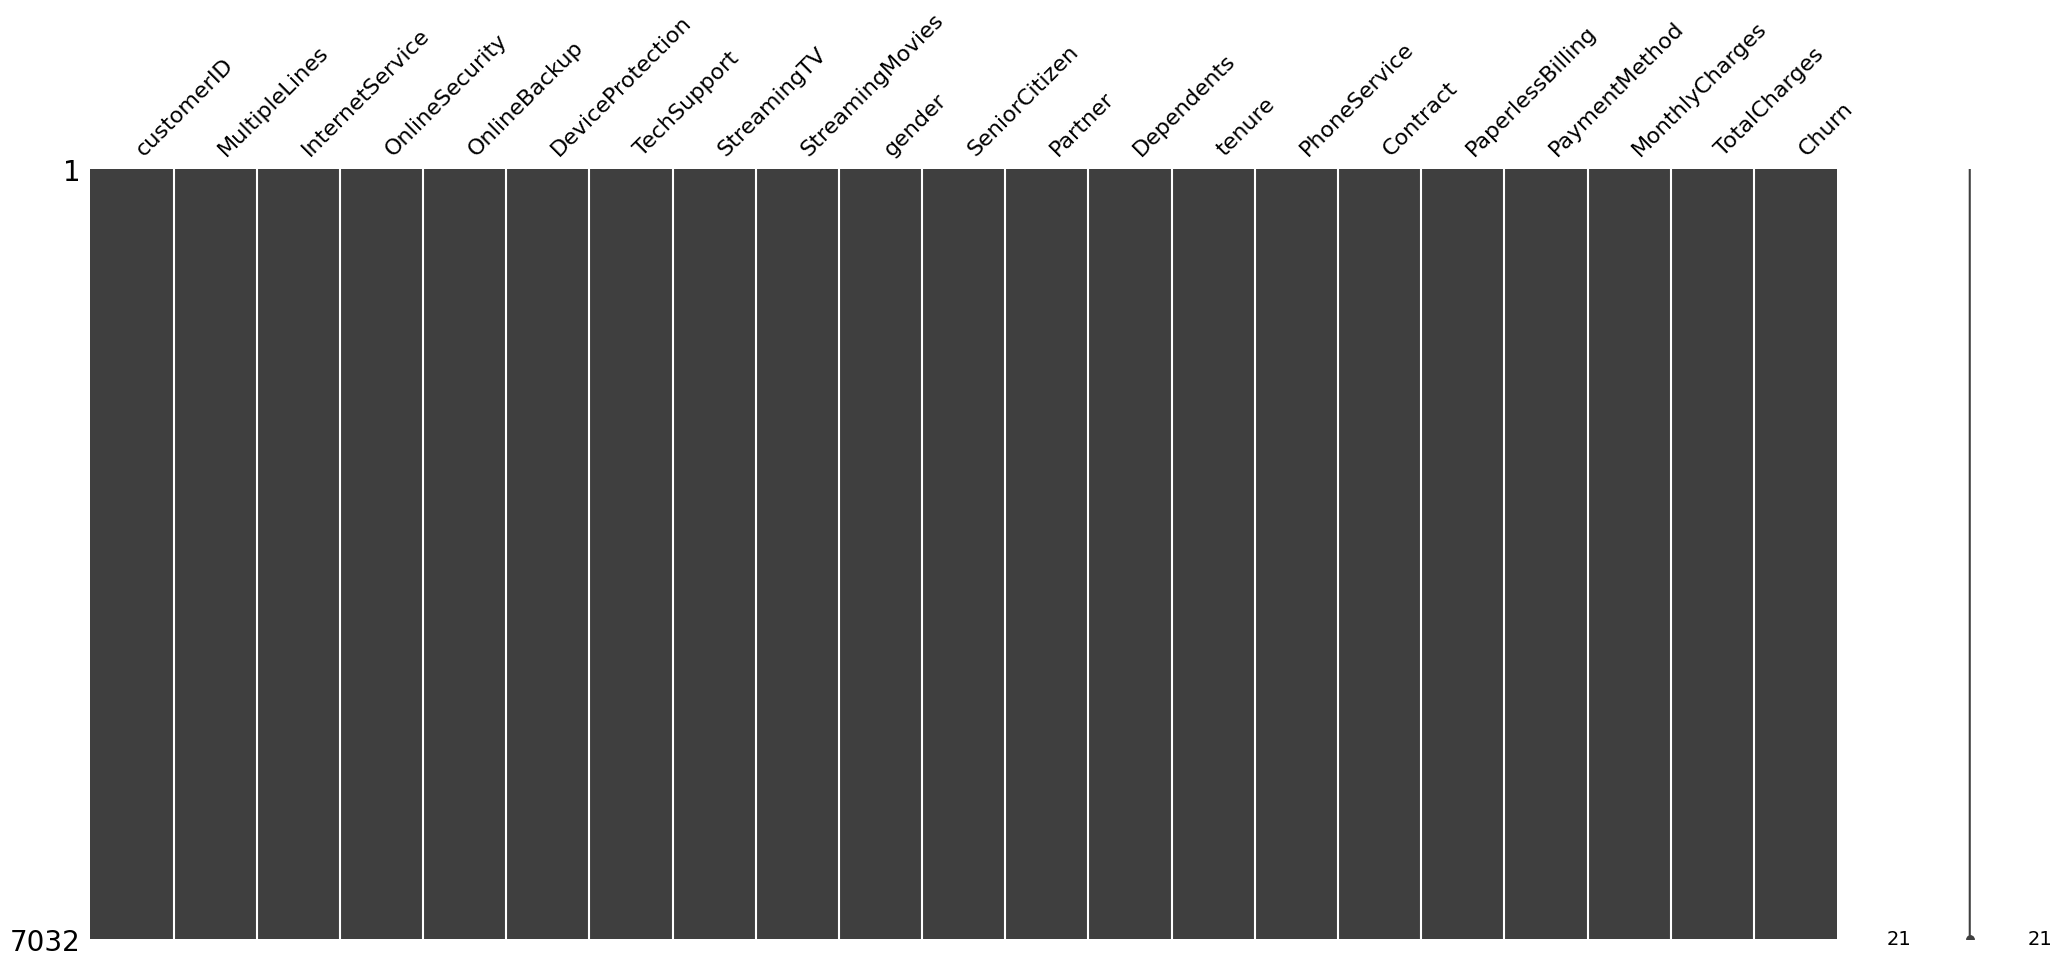

In [30]:
# Lets check missin values
msno.matrix(data)

Droping the CustomerID

In [31]:
data=data.drop(['customerID'],axis=1) # Droping Customer ID as it is index no
data.head(2)
print(data.shape)

(7032, 20)


Meking Numaric Columns Separtae for Data Set

In [32]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges'] # Getting Numaric Data
data[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


Let's do some Visualization and Analysis


In [33]:
data['gender'].value_counts()/data['Churn'].count() # Customers are 49.5 % female and 50.5 % male.

Male      0.504693
Female    0.495307
Name: gender, dtype: float64

In [34]:
data["Churn"][data["Churn"]=="No"].groupby(by=data["gender"]).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [35]:
data["Churn"][data["Churn"]=="Yes"].groupby(by=data["gender"]).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

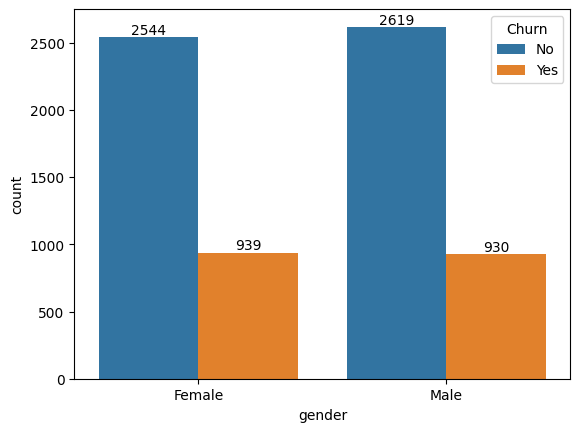

In [36]:
sns.countplot(x='gender', hue='Churn', data=data);
ax = plt.gca()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

In [37]:
data['SeniorCitizen'].value_counts()/data['SeniorCitizen'].count()

0    0.8376
1    0.1624
Name: SeniorCitizen, dtype: float64

In [38]:
data['SeniorCitizen'].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

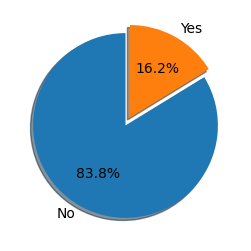

In [39]:
plt.figure(figsize=(5,3))
sizes = data.SeniorCitizen.value_counts()
labels = ["No", "Yes"]
explode = (0, 0.1,)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

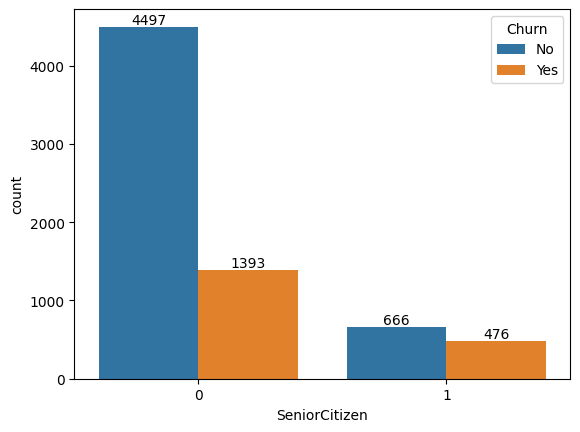

In [40]:
sns.countplot(x='SeniorCitizen', hue='Churn', data=data);
ax = plt.gca()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

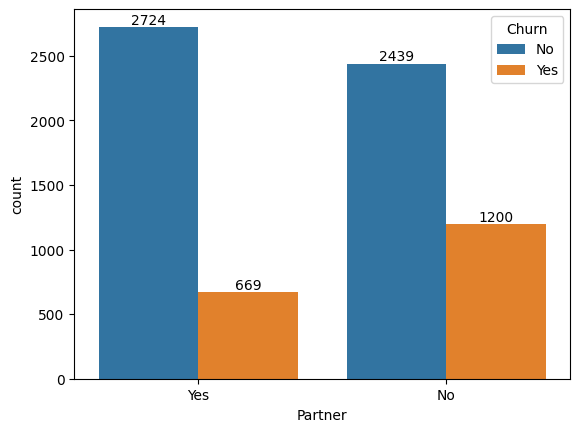

In [41]:
sns.countplot(x='Partner', hue='Churn', data=data);
ax = plt.gca()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

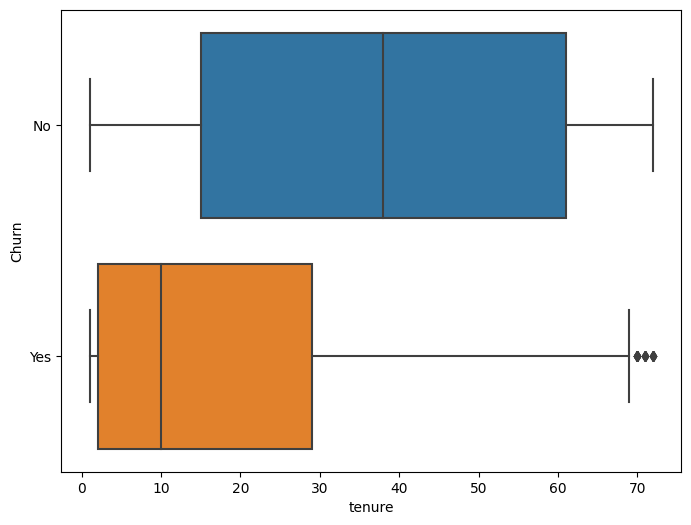

In [42]:
plt.figure(figsize=(8,6))
sns.boxplot(x='tenure', y='Churn',data=data); # New cutomers are chruned

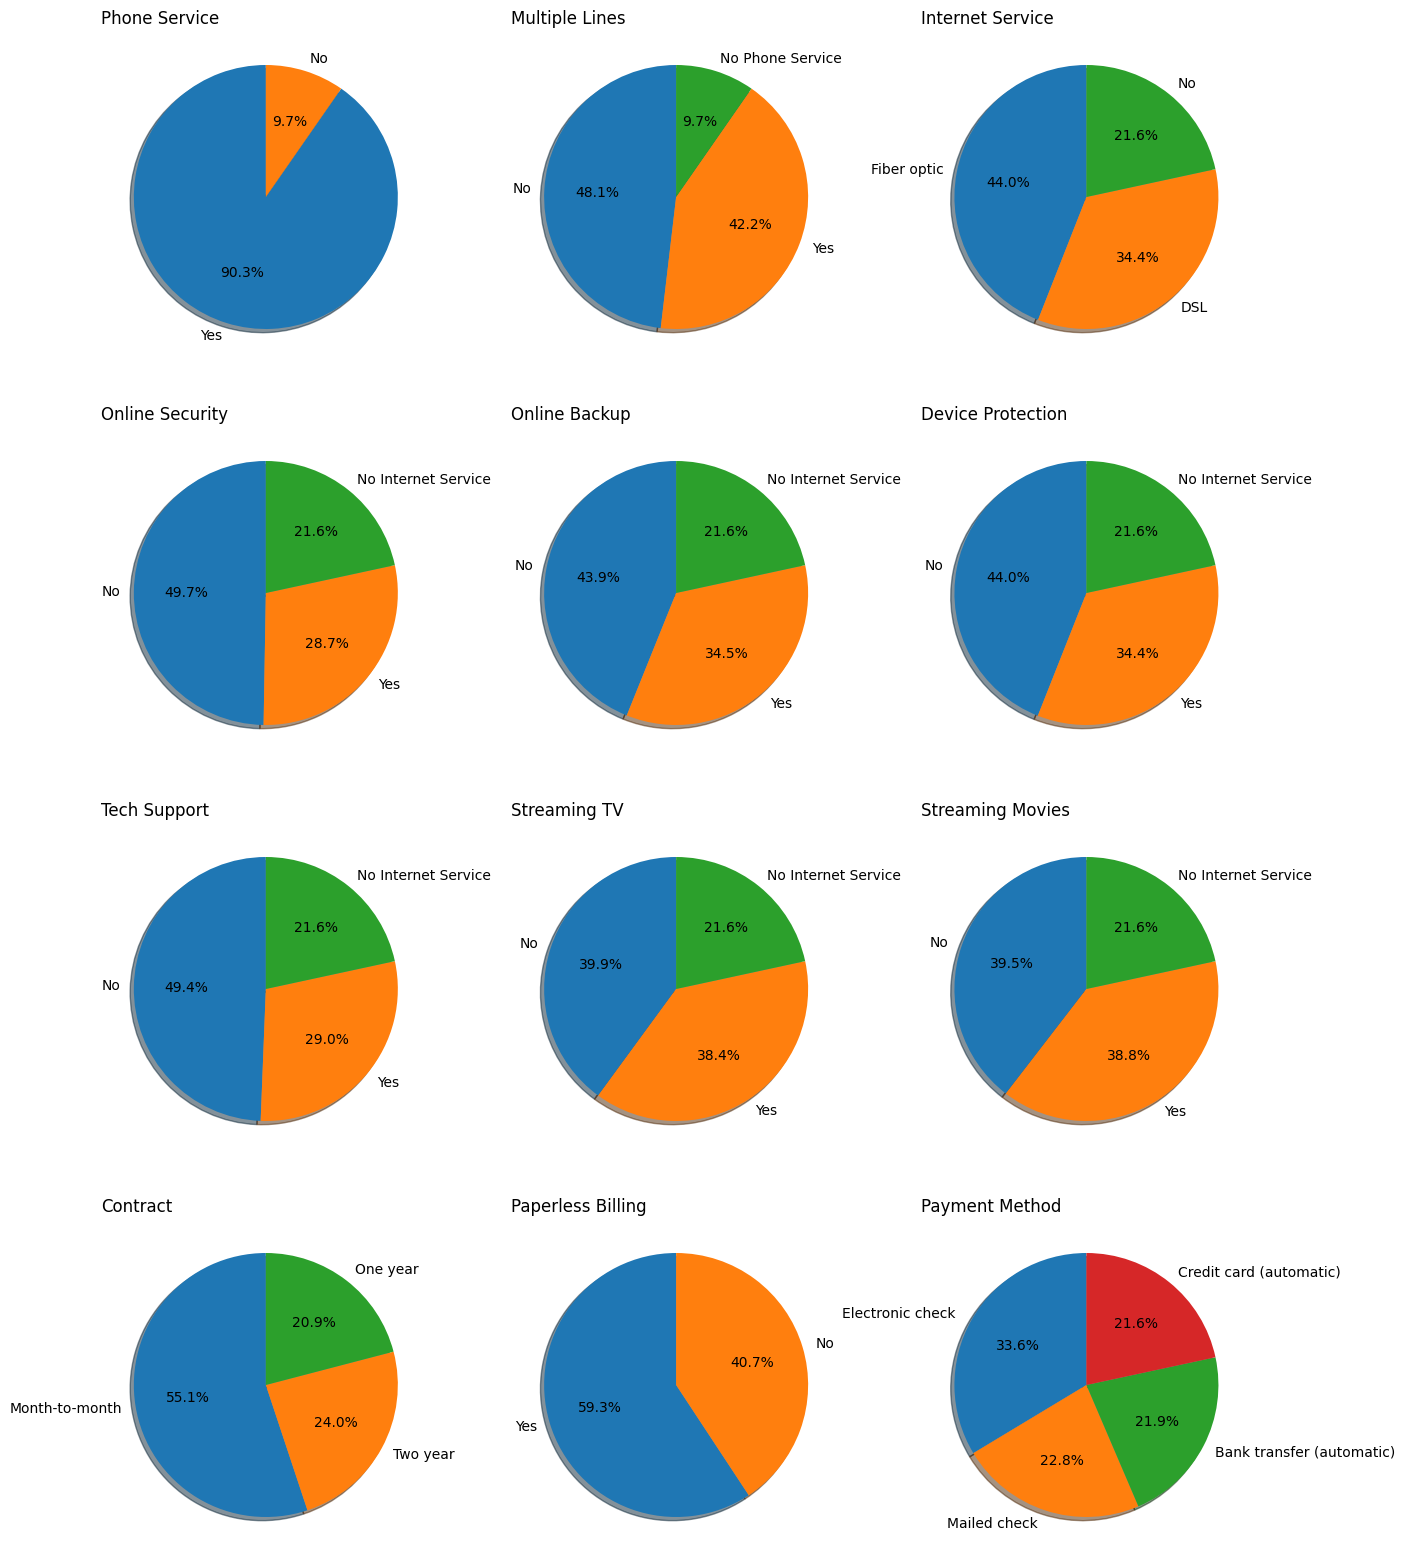

In [43]:
plt.figure(figsize=(15,30))

plt.subplot(6, 3, 1)
sizes = data.PhoneService.value_counts()
labels = ["Yes", "No"]
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Phone Service', loc='left')

plt.subplot(6, 3, 2)
sizes = data.MultipleLines.value_counts()
labels = ["No", "Yes", 'No Phone Service']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Multiple Lines', loc='left')

plt.subplot(6, 3, 3)
sizes = data.InternetService.value_counts()
labels = ["Fiber optic", "DSL", 'No']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Internet Service', loc='left')

plt.subplot(6, 3, 4)
sizes = data.OnlineSecurity.value_counts()
labels = ["No", "Yes", 'No Internet Service']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Online Security', loc='left')

plt.subplot(6, 3, 5)
sizes = data.OnlineBackup.value_counts()
labels = ["No", "Yes", 'No Internet Service']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Online Backup', loc='left')

plt.subplot(6, 3, 6)
sizes = data.DeviceProtection.value_counts()
labels = ["No", "Yes", 'No Internet Service']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Device Protection', loc='left')

plt.subplot(6, 3, 7)
sizes = data.TechSupport.value_counts()
labels = ["No", "Yes", 'No Internet Service']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Tech Support', loc='left')

plt.subplot(6, 3, 8)
sizes = data.StreamingTV.value_counts()
labels = ["No", "Yes", 'No Internet Service']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Streaming TV', loc='left')

plt.subplot(6, 3, 9)
sizes = data.StreamingMovies.value_counts()
labels = ["No", "Yes", 'No Internet Service']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Streaming Movies', loc='left')

plt.subplot(6, 3, 10)
sizes = data.Contract.value_counts()
labels = ["Month-to-month", "Two year", 'One year']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Contract', loc='left')

plt.subplot(6, 3, 11)
sizes = data.PaperlessBilling.value_counts()
labels = ["Yes", "No"]
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Paperless Billing', loc='left')

plt.subplot(6, 3, 12)
sizes = data.PaymentMethod.value_counts()
labels = ["Electronic check ", "Mailed check ", 'Bank transfer (automatic)', 'Credit card (automatic)']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Payment Method', loc='left');

In [44]:
columns = {'PhoneService':1, 'MultipleLines':2, 'InternetService':3, 'OnlineSecurity':4, 'OnlineBackup':5, 'DeviceProtection':6,
          'TechSupport':7, 'StreamingTV':8, 'StreamingMovies':9, 'Contract':10, 'PaperlessBilling':11, 'PaymentMethod':12}

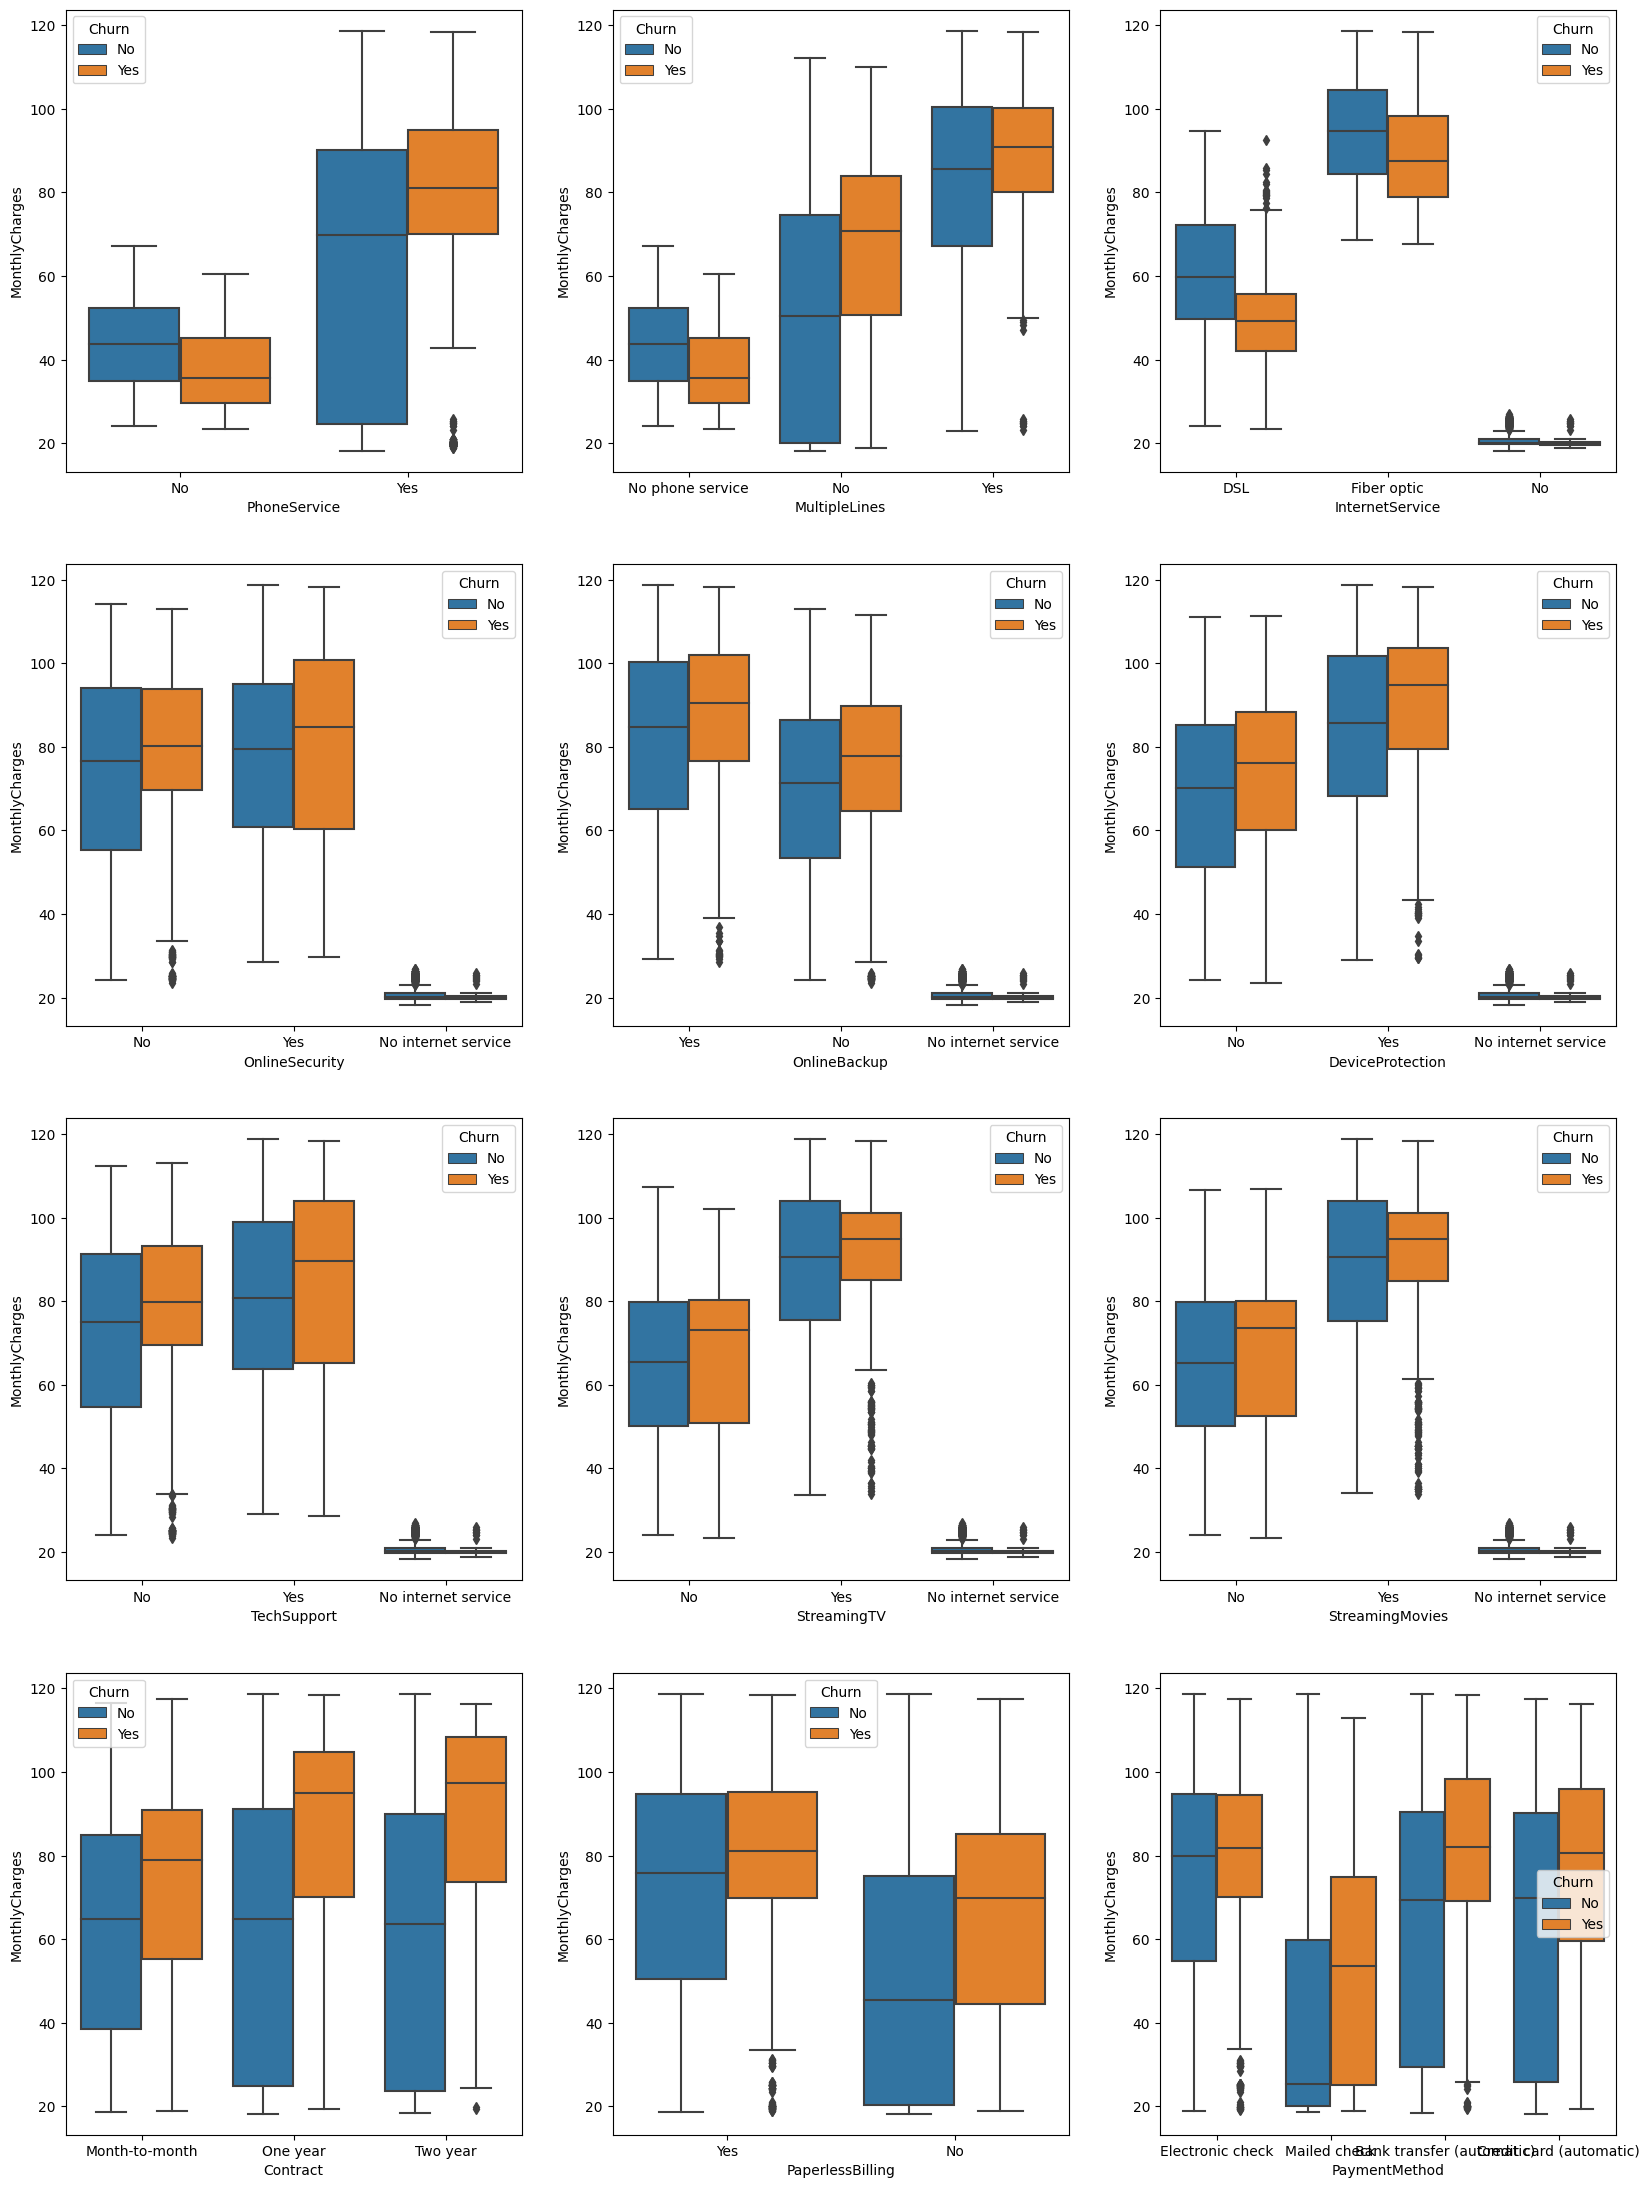

In [45]:
plt.figure(figsize=(20, 42))

for key, value in columns.items():
    plt.subplot(6, 3, value)
    sns.boxplot(x=key, y='MonthlyCharges',hue='Churn', data=data);

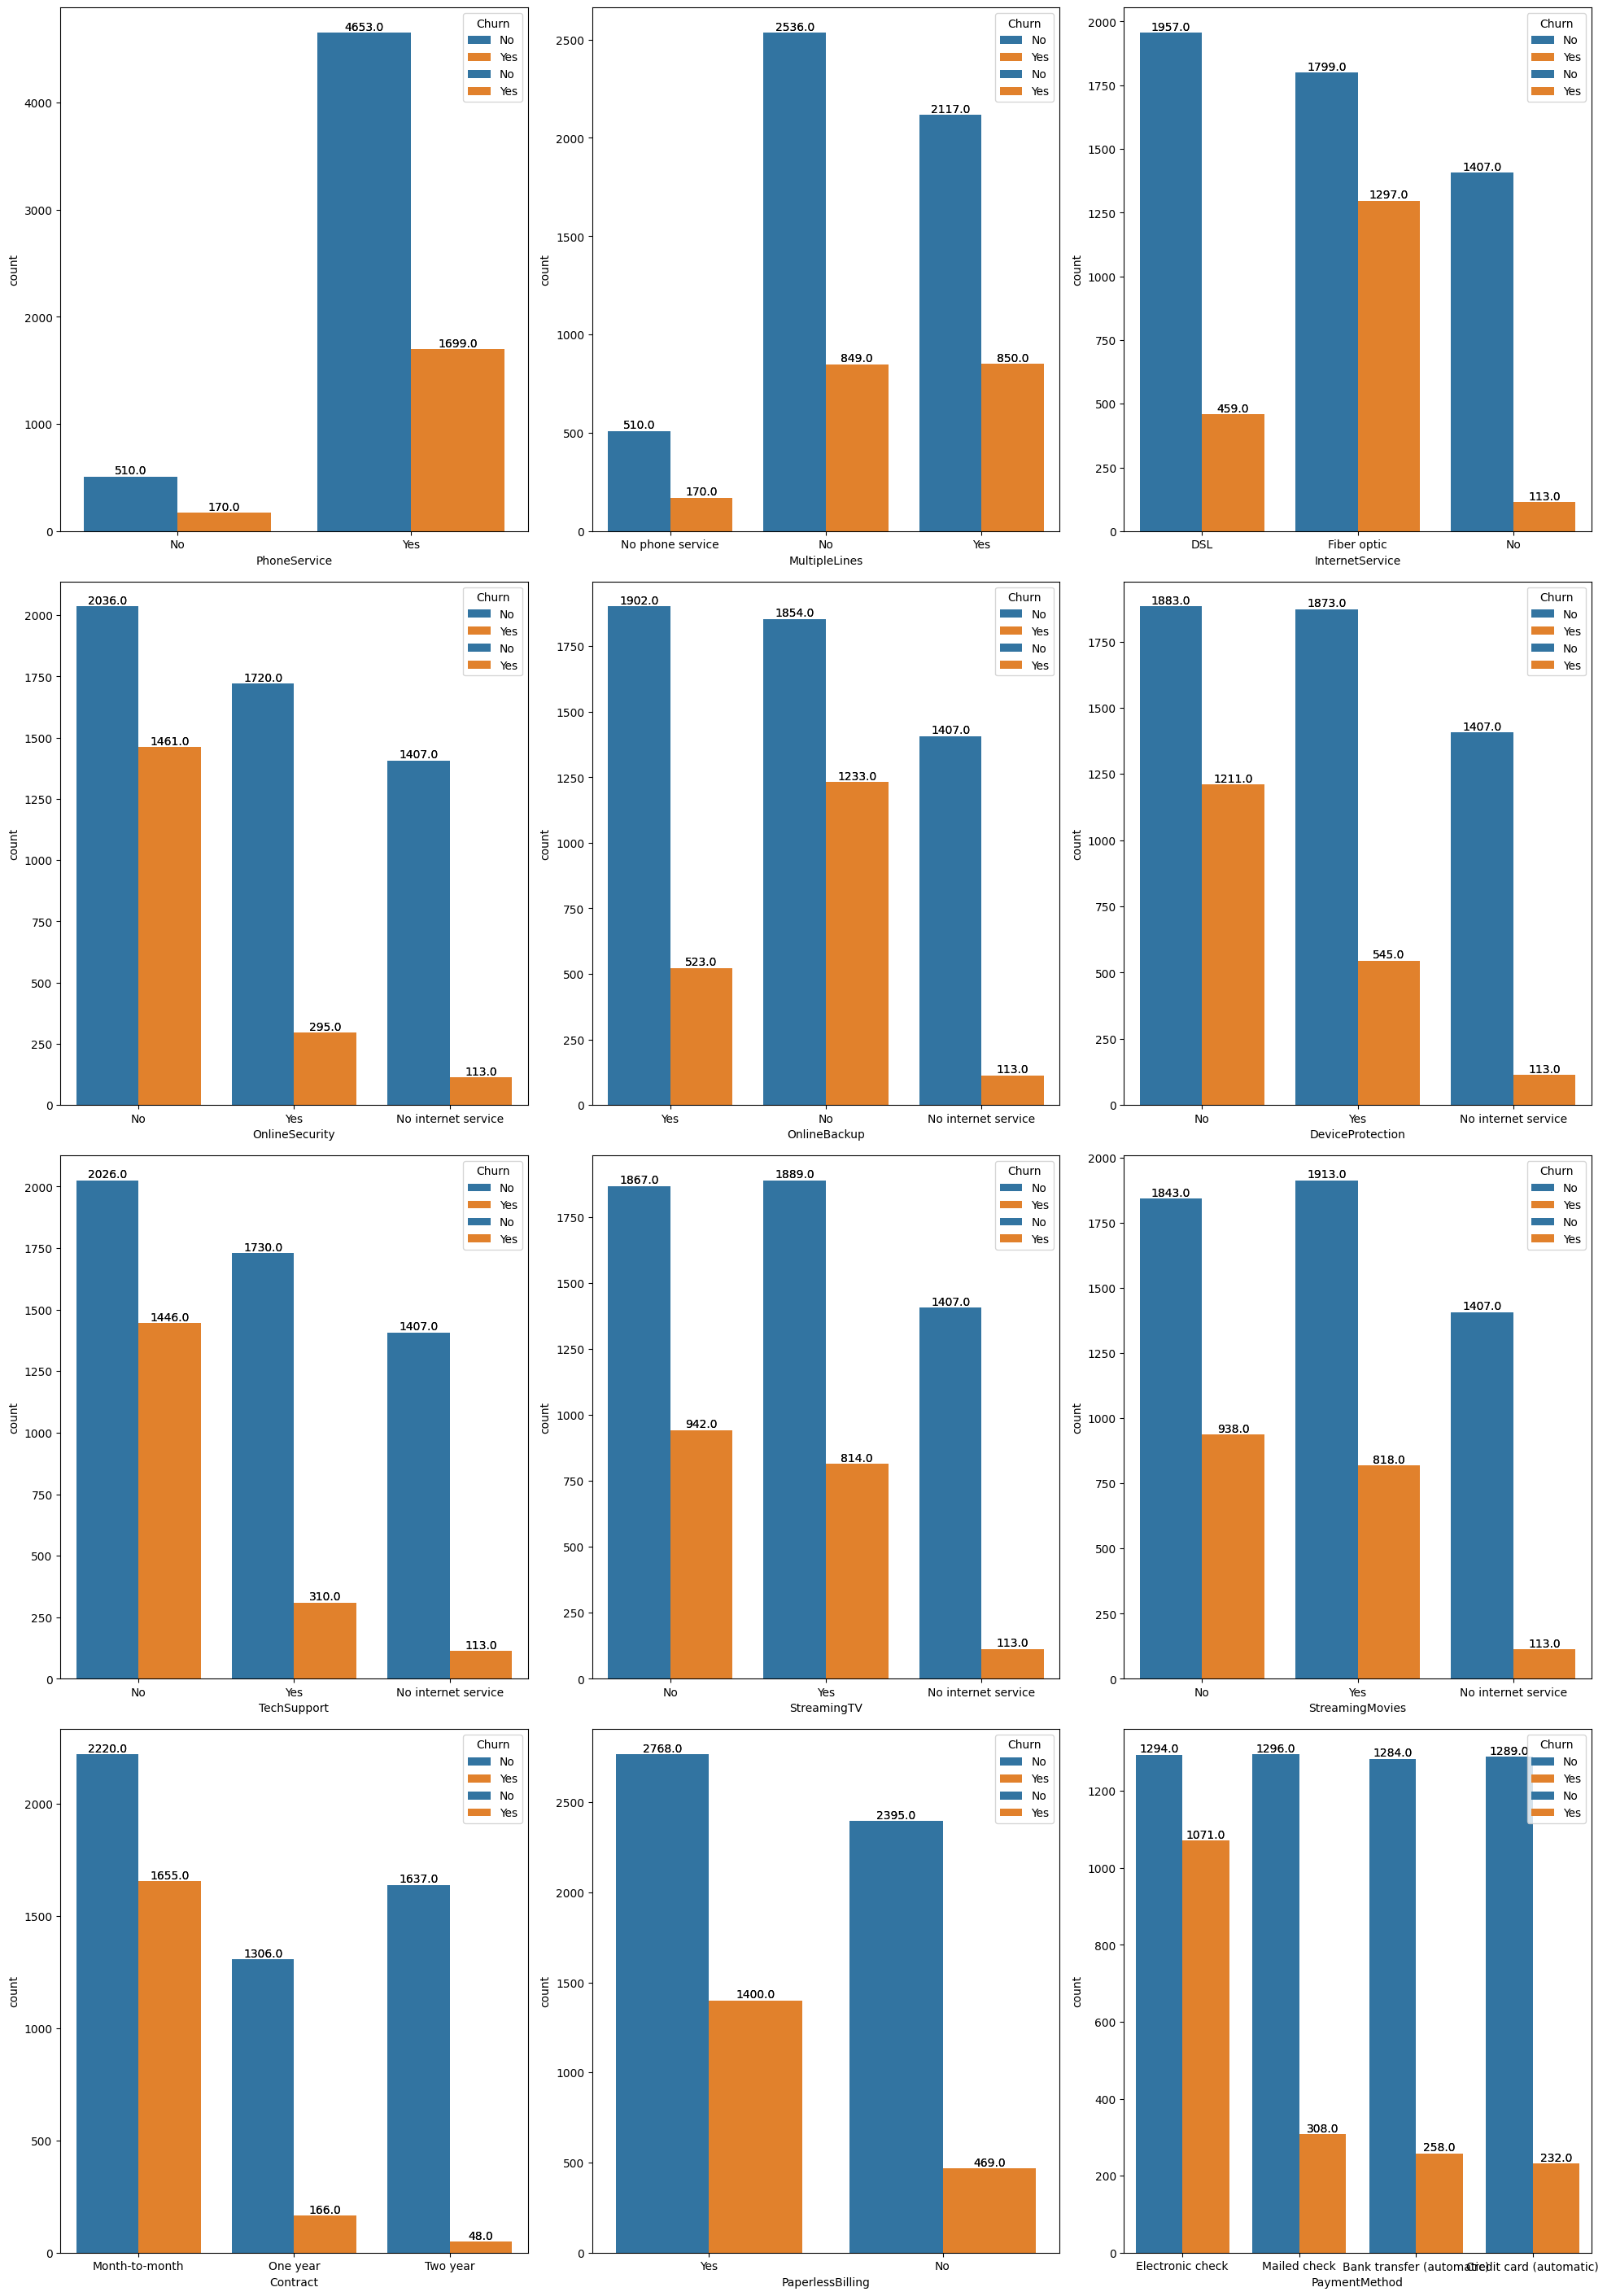

In [46]:
plt.figure(figsize=(20, 42))

for key, value in columns.items():
    plt.subplot(6, 3, value)
    ax=sns.countplot(x=key, hue='Churn', data=data)
    for p in sns.countplot(x=key, hue='Churn', data=data).patches:
        height = p.get_height()
        plt.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                     ha='center', va='bottom', fontsize=10)




#mplcursors.cursor().connect("add", lambda sel: sel.annotation.set_text(sel.artist.get_height()))
plt.tight_layout()
plt.show()





*   No online security churning rate is High - 71.3 %
*   No online backup Churning rate is High -  66 %
*   No device protection churning rate is High -64 %
*   No Tech Support Chrinig rate is 71%
*   Streamin TV and Streamig movies are good
*   Month to Month contract Churning rate is High about 75 %
*   Electronic Check customer churning rate is High about 82 %






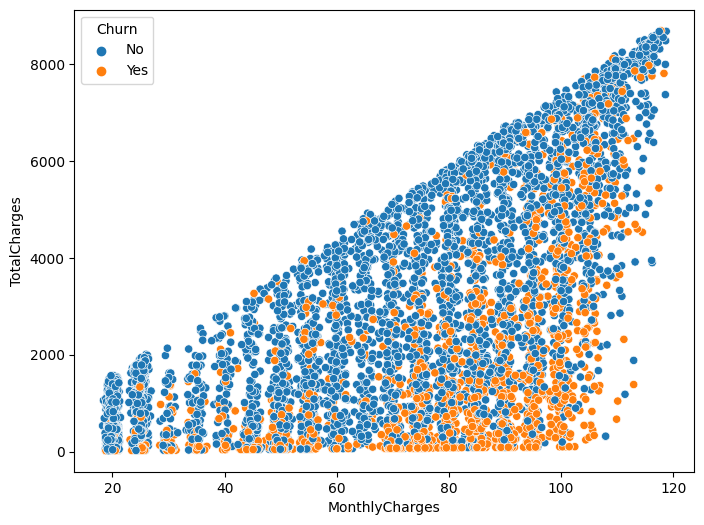

In [47]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges',hue='Churn', data=data);

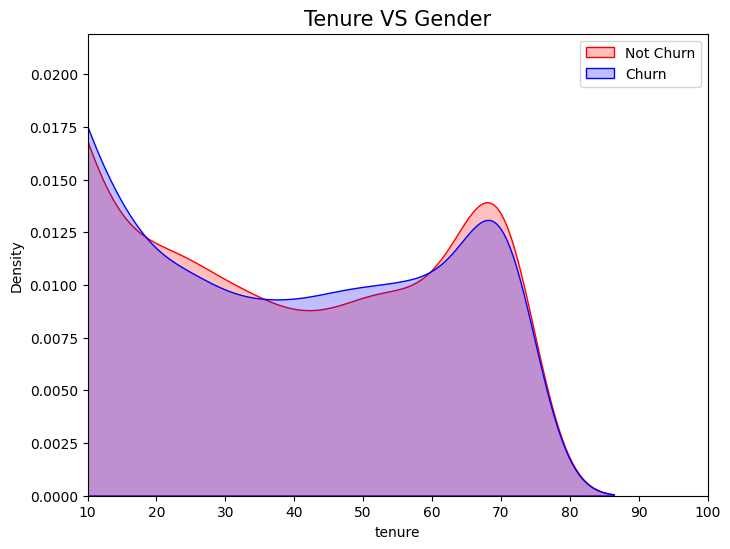

In [48]:
plt.figure(figsize=(8,6))

sns.kdeplot(data[data['gender'] == 'Male']["tenure"], color='red', shade=True)
sns.kdeplot(data[data['gender'] == 'Female']["tenure"], color='blue', shade=True)

plt.title('Tenure VS Gender', fontsize=15)
plt.legend(["Not Churn","Churn"],loc='upper right');
plt.xlim([10,100])
plt.show()

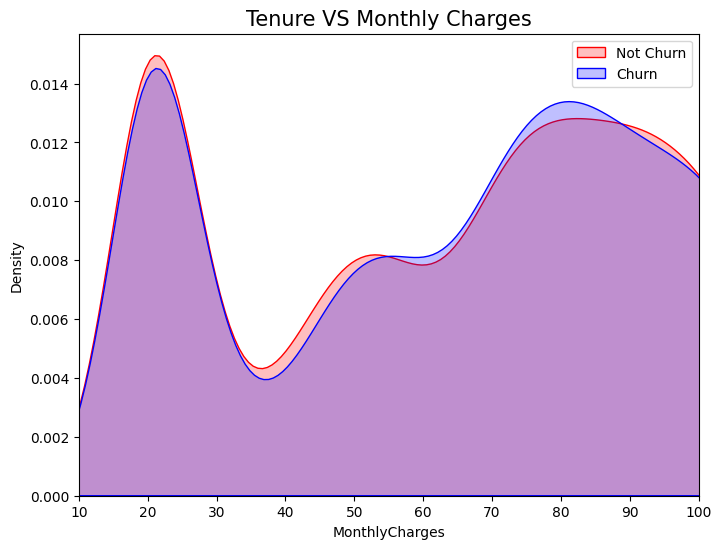

In [49]:
plt.figure(figsize=(8,6))

sns.kdeplot(data[data['gender'] == 'Male']["MonthlyCharges"], color='red', shade=True)
sns.kdeplot(data[data['gender'] == 'Female']["MonthlyCharges"], color='blue', shade=True)

plt.title('Tenure VS Monthly Charges', fontsize=15)
plt.legend(["Not Churn","Churn"],loc='upper right');
plt.xlim([10,100])
plt.show()

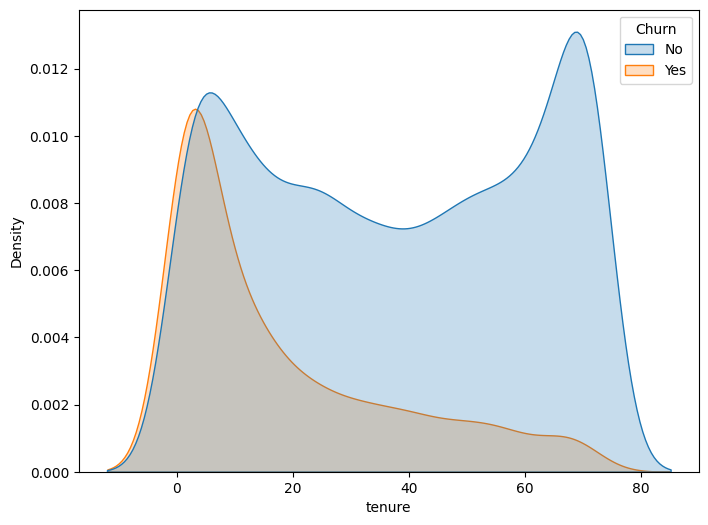

In [50]:
plt.figure(figsize=(8, 6))
sns.kdeplot(x='tenure', hue='Churn', data=data, shade=True);
ax = plt.gca()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

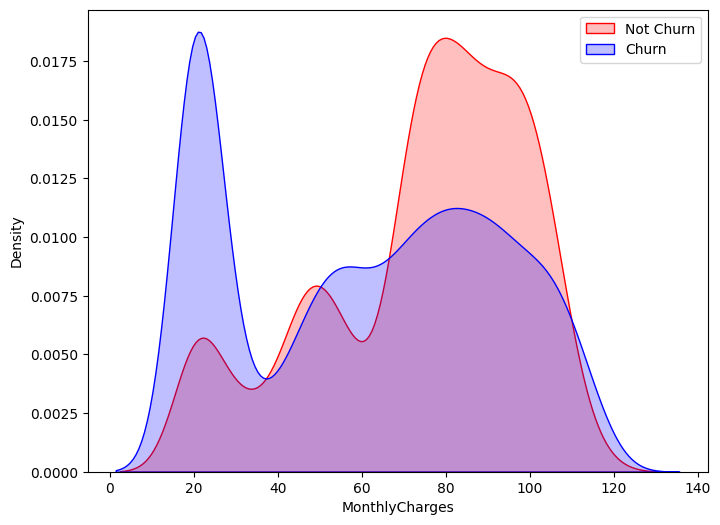

In [51]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data[data['Churn'] == 'Yes']["MonthlyCharges"], color='red', shade=True)
sns.kdeplot(data[data['Churn'] == 'No']["MonthlyCharges"], color='blue', shade=True)
plt.legend(["Not Churn","Churn"],loc='upper right');

In [52]:
# Customers with higher Monthly Charges are also more likely to churn

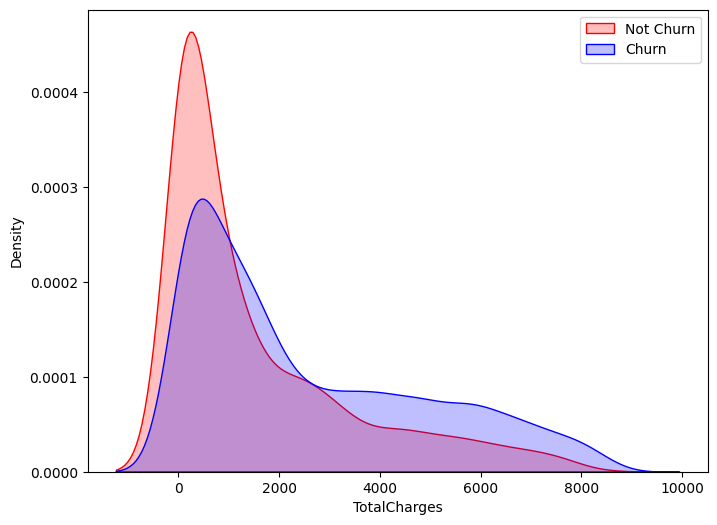

In [53]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data[data['Churn'] == 'Yes']["TotalCharges"], color='red', shade=True)
sns.kdeplot(data[data['Churn'] == 'No']["TotalCharges"], color='blue', shade=True)
plt.legend(["Not Churn","Churn"],loc='upper right');

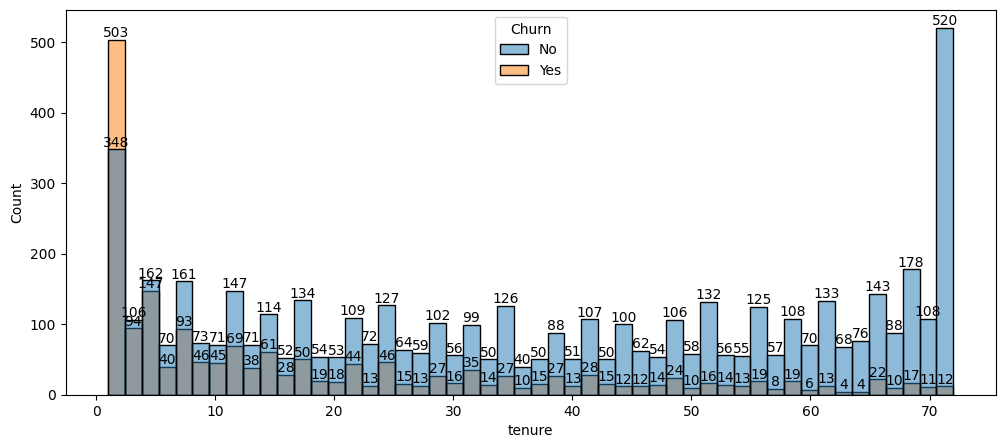

In [54]:
plt.figure(figsize=(12,5))
sns.histplot(x='tenure', hue='Churn', data=data, bins=50)
ax = plt.gca()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

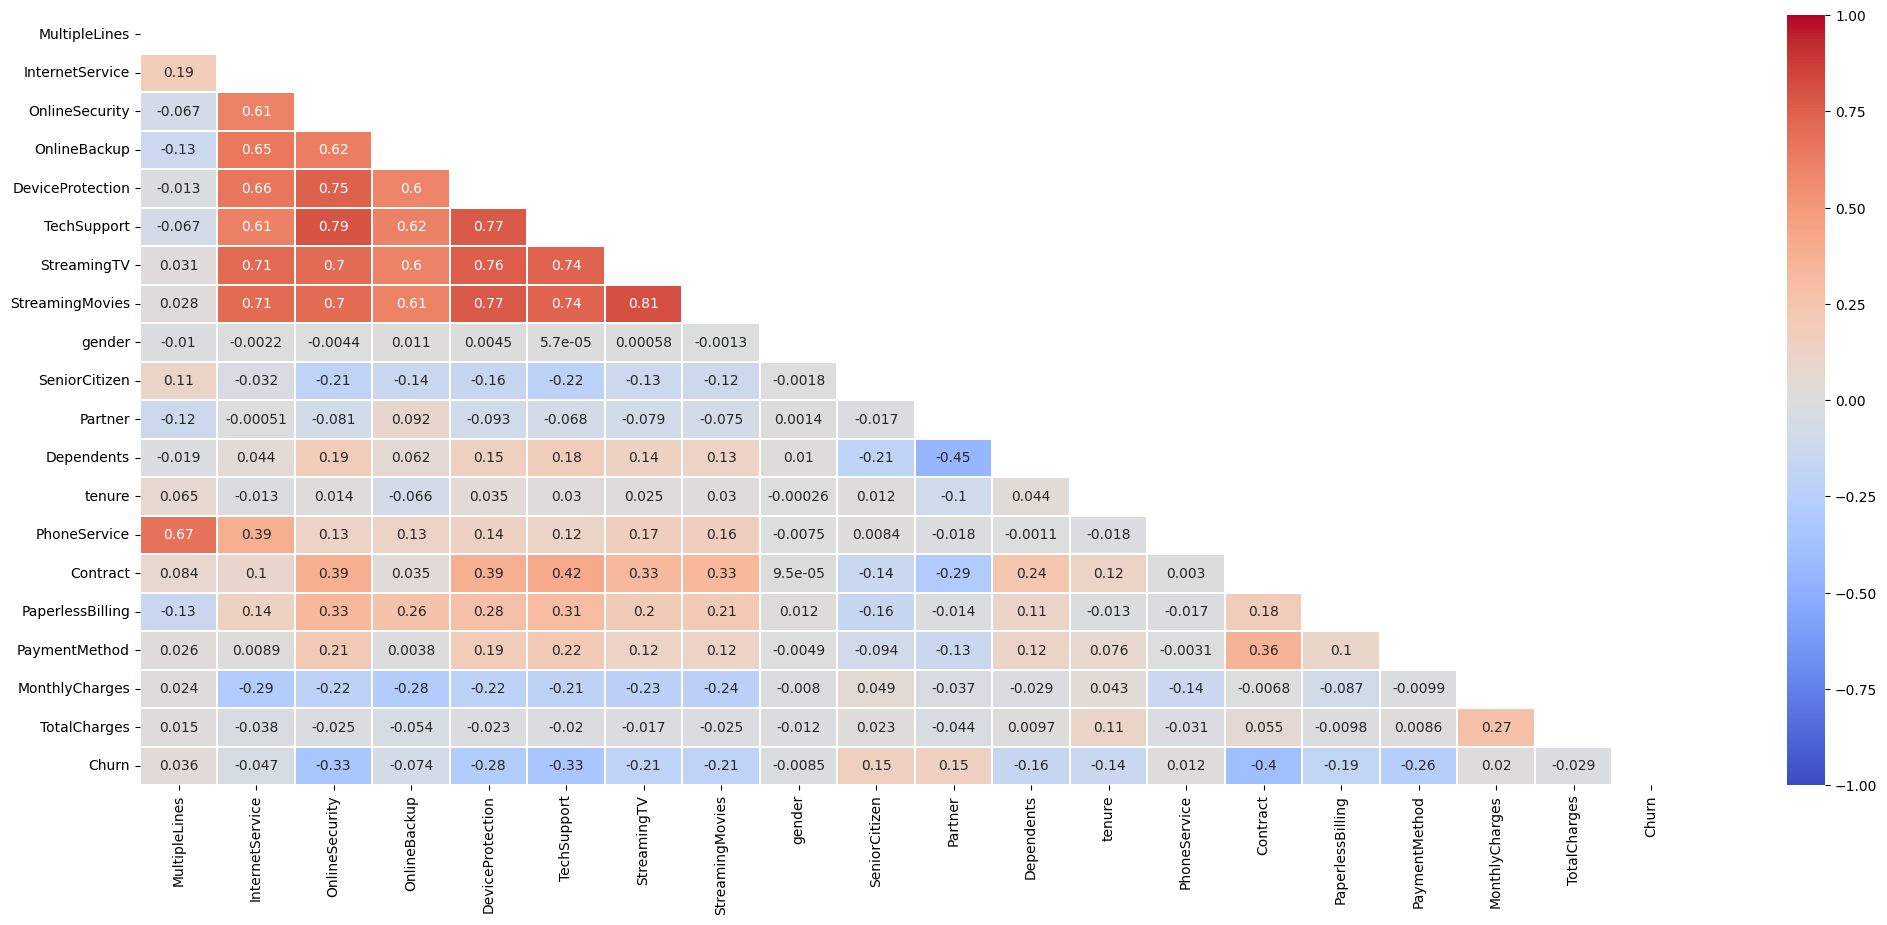

In [55]:
plt.figure(figsize=(25, 10))
corr = data.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

Lets Check data type and unique Categeories

In [56]:
data.dtypes

MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Some of the columns have no internet service or no phone service, that can be replaced with a simple No

In [57]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [58]:
data.replace('No internet service','No',inplace=True)
data.replace('No phone service','No',inplace=True)

In [59]:
print_unique_col_values(data)

MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [60]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    data[col].replace({'Yes': 1,'No': 0},inplace=True)

In [61]:
for col in data:
    print(f'{col}: {data[col].unique()}')

MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [62]:
data['gender'].replace({'Female':1,'Male':0},inplace=True)

In [63]:
data.gender.unique()

array([1, 0])

OHE

In [64]:
data2 = pd.get_dummies(data=data, columns=['InternetService','Contract','PaymentMethod'])
data2.columns

Index(['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [65]:
data2.sample(2)

,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4494,0,0,1,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2777,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [66]:
data2.dtypes

MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             



---



---



Scaling of Numaric Columns in the dataSet


In [67]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data2[cols_to_scale] = scaler.fit_transform(data2[cols_to_scale])

In [68]:
for col in data2:
    print(f'{col}: {data2[col].unique()}')

MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422

In [69]:
X = data2.drop(columns = ['Churn'])
y = data2['Churn'].values

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [71]:
X_train.shape

(4922, 26)

In [72]:
X_test.shape

(2110, 26)

In [ ]:
X_train.columns


Index(['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

-  Use scikit-learn to grid search the learning rate and momentum

- ANN Hyper Tuned Parameters are
Best: 0.803470 using {'learn_rate': 0.001, 'momentum': 0.2} @ 1Hrs 41 Min

In [ ]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
from sklearn.model_selection import StratifiedKFold

def create_model(learn_rate=0.01, momentum=0):

  model = Sequential()
  model.add(Dense(40, input_dim=26, activation='relu'))
  model.add(Dense(40,activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  optimizer = SGD(lr=learn_rate, momentum=momentum)
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.803470 using {'learn_rate': 0.001, 'momentum': 0.2}
0.799915 (0.002512) with: {'learn_rate': 0.001, 'momentum': 0.0}
0.803470 (0.002520) with: {'learn_rate': 0.001, 'momentum': 0.2}
0.800484 (0.001918) with: {'learn_rate': 0.001, 'momentum': 0.4}
0.799488 (0.002976) with: {'learn_rate': 0.001, 'momentum': 0.6}
0.794226 (0.003489) with: {'learn_rate': 0.001, 'momentum': 0.8}
0.790956 (0.005024) with: {'learn_rate': 0.001, 'momentum': 0.9}
0.793089 (0.001939) with: {'learn_rate': 0.01, 'momentum': 0.0}
0.788538 (0.003003) with: {'learn_rate': 0.01, 'momentum': 0.2}
0.787116 (0.000348) with: {'learn_rate': 0.01, 'momentum': 0.4}
0.779010 (0.005363) with: {'learn_rate': 0.01, 'momentum': 0.6}
0.759528 (0.011268) with: {'learn_rate': 0.01, 'momentum': 0.8}
0.745734 (0.016193) with: {'learn_rate': 0.01, 'momentum': 0.9}
0.748151 (0.016002) with: {'learn_rate': 0.1, 'momentum': 0.0}
0.755262 (0.005769) with: {'learn_rate': 0.1, 'momentum': 0.2}
0.743316 (0.006970) with: {'learn_rate':

- Use scikit-learn to grid search the weight initialization @ 16 Min
- Best Parameters Are Best: 0.765216 using {'init_mode': 'uniform'}

In [ ]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

# Function to create model, required for KerasClassifier
def create_model(init_mode='uniform'):
    # create model
    model = Sequential()
    model.add(Dense(40, input_dim=26, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(40, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load dataset
#dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
# X = dataset[:,0:8]
# Y = dataset[:,8]

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.765216 using {'init_mode': 'uniform'}
0.765216 (0.009152) with: {'init_mode': 'uniform'}
0.764932 (0.004939) with: {'init_mode': 'lecun_uniform'}
0.764363 (0.009277) with: {'init_mode': 'normal'}
0.734215 (0.004555) with: {'init_mode': 'zero'}
0.754693 (0.006395) with: {'init_mode': 'glorot_normal'}
0.757821 (0.010498) with: {'init_mode': 'glorot_uniform'}
0.754408 (0.010270) with: {'init_mode': 'he_normal'}
0.757964 (0.012435) with: {'init_mode': 'he_uniform'}


- Use scikit-learn to grid search the activation function @ 12 Min

- Best Parameters are - Best: 0.802332 using {'activation': 'sigmoid'}

In [ ]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

# Function to create model, required for KerasClassifier
def create_model(activation='relu'):
    # create model
    model = Sequential()
    model.add(Dense(40, input_dim=26, kernel_initializer='uniform', activation=activation))
    model.add(Dense(40, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load dataset
# dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
# X = dataset[:,0:8]
# Y = dataset[:,8]

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

# define the grid search parameters
activation = ['softmax', 'relu', 'tanh', 'sigmoid', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.802332 using {'activation': 'sigmoid'}
0.787258 (0.008022) with: {'activation': 'softmax'}
0.769625 (0.003096) with: {'activation': 'relu'}
0.791951 (0.006978) with: {'activation': 'tanh'}
0.802332 (0.002239) with: {'activation': 'sigmoid'}
0.795222 (0.005475) with: {'activation': 'linear'}


- Use scikit-learn to grid search the number of neurons @ 17 Min

Best: 0.801621 using {'neurons': 30}

In [ ]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm

# Function to create model, required for KerasClassifier
def create_model(neurons=1):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=26, kernel_initializer='uniform', activation='sigmoid', kernel_constraint=maxnorm(4)))
    model.add(Dense(neurons, kernel_initializer='uniform', activation='sigmoid',kernel_constraint=maxnorm(4)))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# Create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

# Define the grid search parameters
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))



Best: 0.801621 using {'neurons': 30}
0.734215 (0.004555) with: {'neurons': 1}
0.799915 (0.002175) with: {'neurons': 5}
0.798777 (0.002614) with: {'neurons': 10}
0.799488 (0.000348) with: {'neurons': 15}
0.799061 (0.002976) with: {'neurons': 20}
0.799630 (0.002371) with: {'neurons': 25}
0.801621 (0.001742) with: {'neurons': 30}


-Use scikit-learn to grid search the batch size and epochs

Best: 0.802048 using {'batch_size': 40, 'epochs': 10}

In [ ]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(40, input_dim=26, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load dataset
# dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
# X = dataset[:,0:8]
# Y = dataset[:,8]

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.802048 using {'batch_size': 40, 'epochs': 10}
0.794226 (0.008399) with: {'batch_size': 10, 'epochs': 10}
0.777873 (0.004742) with: {'batch_size': 10, 'epochs': 50}
0.765216 (0.005275) with: {'batch_size': 10, 'epochs': 100}
0.800484 (0.001223) with: {'batch_size': 20, 'epochs': 10}
0.783703 (0.006395) with: {'batch_size': 20, 'epochs': 50}
0.760950 (0.006917) with: {'batch_size': 20, 'epochs': 100}
0.802048 (0.004555) with: {'batch_size': 40, 'epochs': 10}
0.780290 (0.004180) with: {'batch_size': 40, 'epochs': 50}
0.772327 (0.001918) with: {'batch_size': 40, 'epochs': 100}
0.798066 (0.002706) with: {'batch_size': 60, 'epochs': 10}
0.789960 (0.005801) with: {'batch_size': 60, 'epochs': 50}
0.773606 (0.003884) with: {'batch_size': 60, 'epochs': 100}
0.800768 (0.003768) with: {'batch_size': 80, 'epochs': 10}
0.788111 (0.001064) with: {'batch_size': 80, 'epochs': 50}
0.780859 (0.003161) with: {'batch_size': 80, 'epochs': 100}
0.796928 (0.002413) with: {'batch_size': 100, 'epochs': 

- Use scikit-learn to grid search the Optimeser
- Best Parameters Best: 0.795791 using {'optimizer': 'SGD'}

In [ ]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(40, input_dim=26, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load dataset
# dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
# X = dataset[:,0:8]
# Y = dataset[:,8]

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.795791 using {'optimizer': 'SGD'}
0.795791 (0.005287) with: {'optimizer': 'SGD'}
0.778868 (0.003347) with: {'optimizer': 'RMSprop'}
0.794226 (0.004729) with: {'optimizer': 'Adagrad'}
0.744596 (0.014515) with: {'optimizer': 'Adadelta'}
0.760381 (0.008563) with: {'optimizer': 'Adam'}
0.782850 (0.002119) with: {'optimizer': 'Adamax'}
0.761234 (0.005040) with: {'optimizer': 'Nadam'}


- All Best Parameters as Followas
- Best: 0.803470 using {'learn_rate': 0.001, 'momentum': 0.2}
- Best: 0.765216 using {'init_mode': 'uniform'}
- Best Parameters are - Best: 0.802332 using {'activation': 'sigmoid'}
- Best: 0.801621 using {'neurons': 30}
- Best: 0.802048 using {'batch_size': 40, 'epochs': 10}
- Best: 0.795791 using {'optimizer': 'SGD'}

-  Build ANN Model

In [93]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.optimizers import SGD




learn_rate = 0.001
momentum = 0.2
init_mode = 'uniform'
activation = 'sigmoid'
neurons = 30
batch_size = 40
epochs = 10
optimizer = 'SGD'

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the model
model = Sequential()
model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation, kernel_initializer=init_mode))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))


y_pred = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred_binary = np.round(y_pred)

# Print the accuracy score on the test data
accuracy = accuracy_score(y_test, y_pred_binary)
print("Test Accuracy:", accuracy)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(cm)

# Create a classification report
class_report = classification_report(y_test, y_pred_binary)
print("Classification Report:")
print(class_report)


Epoch 1/10
63/63 [==============================] - 1s 4ms/step - loss: 0.6919 - accuracy: 0.5482 - val_loss: 0.5863 - val_accuracy: 0.7619
Epoch 2/10
63/63 [==============================] - 0s 2ms/step - loss: 0.5904 - accuracy: 0.7308 - val_loss: 0.5580 - val_accuracy: 0.7619
Epoch 3/10
63/63 [==============================] - 0s 2ms/step - loss: 0.5813 - accuracy: 0.7308 - val_loss: 0.5505 - val_accuracy: 0.7619
Epoch 4/10
63/63 [==============================] - 0s 2ms/step - loss: 0.5785 - accuracy: 0.7308 - val_loss: 0.5479 - val_accuracy: 0.7619
Epoch 5/10
63/63 [==============================] - 0s 2ms/step - loss: 0.5763 - accuracy: 0.7308 - val_loss: 0.5456 - val_accuracy: 0.7619
Epoch 6/10
63/63 [==============================] - 0s 2ms/step - loss: 0.5740 - accuracy: 0.7308 - val_loss: 0.5434 - val_accuracy: 0.7619
Epoch 7/10
63/63 [==============================] - 0s 2ms/step - loss: 0.5718 - accuracy: 0.7308 - val_loss: 0.5411 - val_accuracy: 0.7619
Epoch 8/10
63/63 [==

In [87]:
import tensorflow as tf

In [88]:
model = tf.keras.Sequential([
    tf.keras.Input(26),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=5, verbose=0,
    mode='auto', baseline=None, restore_best_weights= True
)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC(name='auc')]
)


BATCH_SIZE = 100
EPOCHS = 10

history = model.fit(
    X_train,
    y_train,
    validation_split=0.20,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=0,
    callbacks = early_stopping
)

In [84]:
history.history.keys()

dict_keys(['loss', 'auc', 'val_loss', 'val_auc'])

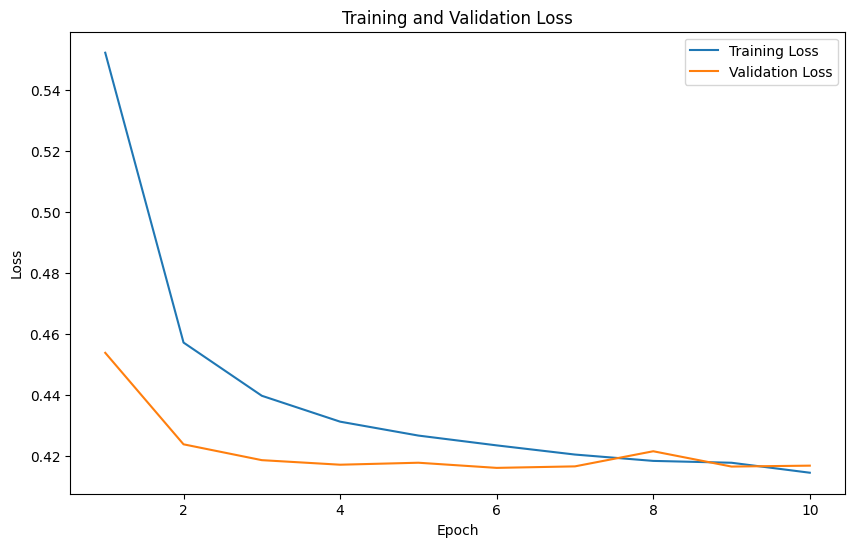

In [85]:
plt.figure(figsize=(10, 6))

epochs = range(1, EPOCHS + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, train_loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")

plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [86]:
model.evaluate(X_test, y_test)

66/66 [==============================] - 0s 1ms/step - loss: 0.4063 - auc: 0.8551


[0.4063469171524048, 0.8551069498062134]